In [ ]:
#Answe1)

Polynomial functions and kernel functions are related concepts in machine learning, particularly in the context of Support Vector Machines (SVMs) and other kernelized algorithms. The relationship lies in the use of kernel functions to implicitly map data into high-dimensional spaces, allowing for the effective handling of non-linear relationships. Polynomial functions are a specific type of kernel function.

### Polynomial Kernel:

A polynomial kernel is a type of kernel function commonly used in SVMs. The polynomial kernel of degree \(d\) is defined as:

\[ K(\mathbf{x}_i, \mathbf{x}_j) = (\mathbf{x}_i \cdot \mathbf{x}_j + c)^d \]

Here:
- \(\mathbf{x}_i\) and \(\mathbf{x}_j\) are input feature vectors.
- \(c\) is a constant term.
- \(d\) is the degree of the polynomial.

The polynomial kernel computes the dot product of input feature vectors, raises it to a certain power \(d\), and adds a constant term \(c\). This operation implicitly transforms the input features into a higher-dimensional space.

### Relationship:

1. **Implicit Mapping:**
   - Both polynomial functions and kernel functions are used for implicit mapping of data into higher-dimensional spaces.
   - Polynomial functions explicitly define the mapping by raising the input features to a certain power.

2. **Non-Linearity:**
   - Polynomial functions introduce non-linearities into the mapping, capturing more complex relationships in the data.
   - Kernel functions, including polynomial kernels, allow SVMs to handle non-linear decision boundaries.

3. **Avoiding Explicit Transformation:**
   - One advantage of kernel functions is that they avoid the need for explicit transformation of data into higher dimensions, which can be computationally expensive.
   - The kernel trick allows SVMs to compute the dot product in the higher-dimensional space without explicitly calculating the transformed features.

4. **Flexibility:**
   - Both polynomial functions and polynomial kernels provide flexibility in capturing patterns and structures in the data.
   - Higher-degree polynomial kernels can capture more intricate relationships but may also be prone to overfitting.

### Example:

In SVMs, the choice of a polynomial kernel with an appropriate degree can be seen as a way of introducing non-linearities into the decision boundary. For example, a quadratic (degree-2) polynomial kernel can capture quadratic relationships between features, while higher-degree polynomials can capture more complex patterns.

```python
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example of using polynomial kernel in SVM
degree = 2  # Degree of the polynomial kernel
svm_model = SVC(kernel='poly', degree=degree, C=1.0)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with degree-{degree} polynomial kernel: {accuracy:.2f}")
```

In this example, a polynomial kernel of degree 2 is used in an SVM to classify a synthetic dataset. The polynomial kernel introduces non-linearities, and the choice of degree influences the complexity of the decision boundary.

Accuracy with degree-2 polynomial kernel: 0.45


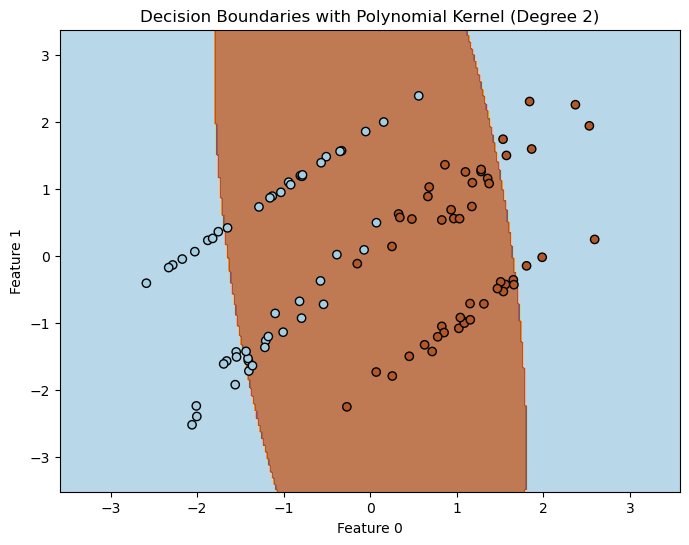

In [1]:
## Answer 2)
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example of using polynomial kernel in SVM
degree = 2  # Degree of the polynomial kernel

# Create an SVM classifier with a polynomial kernel
svm_model = SVC(kernel='poly', degree=degree, C=1.0)
svm_model.fit(X_train, y_train)

# Predict labels for the testing set
y_pred = svm_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with degree-{degree} polynomial kernel: {accuracy:.2f}")

# Plot decision boundaries
def plot_decision_boundaries(X, y, model, feature_indices=(0, 1)):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, feature_indices[0]].min() - 1, X[:, feature_indices[0]].max() + 1
    y_min, y_max = X[:, feature_indices[1]].min() - 1, X[:, feature_indices[1]].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, feature_indices[0]], X[:, feature_indices[1]], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel(f"Feature {feature_indices[0]}")
    plt.ylabel(f"Feature {feature_indices[1]}")
    plt.title(f'Decision Boundaries with Polynomial Kernel (Degree {degree})')

# Plot decision boundaries using the first two features
plt.figure(figsize=(8, 6))
plot_decision_boundaries(X, y, svm_model)
plt.show()


In [ ]:
## Answer 3))

In Support Vector Regression (SVR), epsilon (\(\varepsilon\)) is a crucial parameter that determines the width of the margin around the regression line within which no penalty is incurred. It is associated with the concept of the epsilon-insensitive loss function, which allows some errors within the margin without affecting the model's performance. The value of epsilon influences the number of support vectors in SVR.

### Epsilon and Support Vectors:

1. **Smaller Epsilon (\(\varepsilon\)):**
   - When the value of epsilon is small, the margin around the regression line becomes narrow.
   - The model becomes more sensitive to errors, allowing fewer data points to lie within the margin without incurring a penalty.
   - As a result, fewer support vectors are tolerated within the margin, and the model might end up with fewer support vectors.

2. **Larger Epsilon (\(\varepsilon\)):**
   - When the value of epsilon is large, the margin becomes wider, allowing more data points to lie within the margin without penalty.
   - The model becomes less sensitive to errors, and more support vectors may be allowed within the margin.
   - As epsilon increases, the model is willing to tolerate larger errors, leading to potentially more support vectors.

### Impact on Number of Support Vectors:

- **Small Epsilon:**
  - A smaller epsilon encourages the model to be more accurate on individual data points.
  - It tends to create a narrow margin and may result in a smaller number of support vectors, as the model is less tolerant of errors.

- **Large Epsilon:**
  - A larger epsilon allows the model to be more flexible and tolerate larger errors.
  - It tends to create a wider margin, potentially allowing more data points to be within the margin without penalty, resulting in a larger number of support vectors.

### Considerations:

- The choice of epsilon is a trade-off between accuracy and flexibility.
- Smaller epsilon values may lead to a more accurate model on training data but might be less generalizable.
- Larger epsilon values allow the model to be more flexible and may generalize better to unseen data but might sacrifice some accuracy.

It's essential to choose the value of epsilon based on the specific characteristics of the data and the problem at hand, considering the trade-off between accuracy and generalization. Cross-validation or grid search can be employed to find an appropriate value for epsilon during model tuning.

In [ ]:
## Answer 4)

Support Vector Regression (SVR) is a powerful regression technique, and the performance of SVR is significantly influenced by several key parameters. Let's discuss the impact of the choice of the kernel function, the C parameter, the epsilon parameter (\(\varepsilon\)), and the gamma parameter on SVR performance.

### 1. Kernel Function:

#### Impact:
- The kernel function determines the mapping of input features into a higher-dimensional space.
- Different kernel functions capture different types of relationships in the data.

#### Examples:
- **Linear Kernel (`kernel='linear'`):**
  - Suitable for linear relationships in the data.
  - Use when the underlying relationship between features and the target variable is approximately linear.

- **Polynomial Kernel (`kernel='poly'`):**
  - Suitable for capturing non-linear relationships with higher-order polynomial features.
  - Choose the degree of the polynomial using the `degree` parameter.

- **Radial Basis Function (RBF) Kernel (`kernel='rbf'`):**
  - Suitable for capturing non-linear relationships with a smooth, non-linear decision boundary.
  - Adjust the width of the kernel using the `gamma` parameter.

### 2. C Parameter:

#### Impact:
- The C parameter controls the trade-off between fitting the training data well and having a smooth decision boundary.
- Larger C values lead to a more accurate fit on the training data but may lead to overfitting.

#### Examples:
- **Small C:**
  - Results in a smoother decision boundary, providing more tolerance for errors within the margin.
  - Use when a more flexible model with a wider margin is desired.

- **Large C:**
  - Emphasizes accurate fitting to the training data, potentially leading to a narrower margin.
  - Use when a more strict fit to the training data is required, even if it may result in a smaller margin.

### 3. Epsilon Parameter:

#### Impact:
- The epsilon parameter (\(\varepsilon\)) determines the width of the margin around the regression line within which no penalty is incurred.
- It controls the sensitivity to errors within the margin.

#### Examples:
- **Small \(\varepsilon\):**
  - Narrow margin, less tolerance for errors within the margin.
  - Use when a more accurate fit on individual data points is desired.

- **Large \(\varepsilon\):**
  - Wider margin, more tolerance for errors within the margin.
  - Use when a more flexible model that tolerates larger errors is desired.

### 4. Gamma Parameter:

#### Impact:
- The gamma parameter defines the influence of a single training example and affects the shape of the decision boundary.
- Smaller gamma values result in a wider Gaussian kernel, leading to a smoother decision boundary.

#### Examples:
- **Small Gamma:**
  - Wider Gaussian kernel, smoother decision boundary.
  - Use when the data has a complex but relatively smooth structure.

- **Large Gamma:**
  - Narrower Gaussian kernel, more intricate decision boundary.
  - Use when the data has intricate and irregular structures.

### Overall Recommendations:

- **Grid Search and Cross-Validation:**
  - Use grid search and cross-validation to find the optimal combination of parameters.
  - Experiment with different kernel functions, C values, epsilon values, and gamma values.

- **Consider Data Characteristics:**
  - The choice of parameters depends on the characteristics of the data and the problem at hand.
  - It's essential to understand the trade-offs and choose parameters that balance model accuracy and generalization.

- **Regularization (C) and Flexibility (epsilon):**
  - Tune the C parameter for regularization and the epsilon parameter for flexibility.

- **Kernel Choice:**
  - The choice of kernel function depends on the nature of the relationship between features and the target variable.

- **Sensitivity to Outliers:**
  - SVR can be sensitive to outliers, so consider preprocessing the data to handle outliers appropriately.

In summary, the choice of kernel function, C parameter, epsilon parameter, and gamma parameter in SVR significantly influences the model's performance. It's crucial to understand the impact of each parameter and adjust them based on the characteristics of the data and the desired trade-offs between accuracy and generalization. Experimentation and fine-tuning using cross-validation are key steps in optimizing SVR parameters for a specific regression task.

In [ ]:
## Answer 5)

# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import joblib  # For saving the trained model

# Load the dataset (replace X, y with your actual features and labels)
# For example, you can use the iris dataset from scikit-learn
from sklearn.datasets import load_iris
data = load_iris()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data (you can choose a different preprocessing technique)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an instance of the SVC classifier
svc_classifier = SVC()

# Train the classifier on the training data
svc_classifier.fit(X_train_scaled, y_train)

# Use the trained classifier to predict labels for the testing data
y_pred = svc_classifier.predict(X_test_scaled)

# Evaluate the performance using accuracy as an example metric
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# You can use other metrics like precision, recall, F1-score, etc.
classification_report_output = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_output)

# Tune hyperparameters using GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}
grid_search = GridSearchCV(SVC(), param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the tuned classifier on the entire dataset
tuned_svc_classifier = SVC(**best_params)
tuned_svc_classifier.fit(X_scaled, y)  # Assuming X_scaled is the entire preprocessed dataset

# Save the trained classifier to a file for future use
joblib.dump(tuned_svc_classifier, 'tuned_svc_classifier.joblib')
